In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout


# Load data

train_images = pickle.load(open('/content/drive/MyDrive/DL Project 1 /636_project1_train_images','rb'))
train_images = train_images.numpy()

train_labels = pickle.load(open('/content/drive/MyDrive/DL Project 1 /636_project1_train_labels', 'rb'))

**Preprocessing on dataset**

In [ ]:
# Preprocessing
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
train_labels = to_categorical(train_labels)

# Split data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

**Create model**

Input Layer: The input shape of the image is (28, 28, 1), which means it is a grayscale image with height and width of 28 pixels, and 1 channel. This is the first layer of the model, and it is a Convolutional layer.

Convolutional Layers: The model has three convolutional layers. The first layer has 32 filters with a kernel size of (3,3) and uses the rectified linear unit (ReLU) activation function. The second layer has 64 filters with a kernel size of (3,3) and also uses the ReLU activation function. The third layer has 64 filters with a kernel size of (3,3) and uses the ReLU activation function.

Pooling Layers: The model has two pooling layers that follow each convolutional layer. The first pooling layer has a pool size of (2,2) which reduces the spatial dimensions of the output by half. The second pooling layer also has a pool size of (2,2).

Flatten Layer: The flatten layer is added after the last convolutional layer to convert the 3D tensor output of the convolutional layers into a 1D tensor.

Dense Layers: The model has two dense layers, each with 128 neurons and ReLU activation function.

Dropout Layer: A dropout layer is added with a rate of 0.5 to overcome overfitting by randomly setting a fraction of input units to zero during training, which forces the model to learn more robust features.

Output Layer: The output layer has 10 neurons and uses the softmax activation function to output a probability distribution over the 10 classes of the MNIST dataset.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) #use dropout to overcome overfitting
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

**Compile the code and train the model**

In [ ]:
# Compile mode
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_images, train_labels, epochs=28, batch_size=64, validation_data=(val_images, val_labels))


# Print train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('Training accuracy:', train_acc[-1])
print('Validation accuracy:', val_acc[-1])

model.save('/content/drive/MyDrive/DL Project 1 /modelproject1.h5')


Epoch 1/28
750/750 [==============================] - 59s 77ms/step - loss: 2.2340 - accuracy: 0.1550 - val_loss: 1.9196 - val_accuracy: 0.3224
Epoch 2/28
750/750 [==============================] - 50s 67ms/step - loss: 1.7222 - accuracy: 0.4034 - val_loss: 1.4949 - val_accuracy: 0.4876
Epoch 3/28
750/750 [==============================] - 52s 69ms/step - loss: 1.4952 - accuracy: 0.4925 - val_loss: 1.3560 - val_accuracy: 0.5268
Epoch 4/28
750/750 [==============================] - 49s 65ms/step - loss: 1.3950 - accuracy: 0.5299 - val_loss: 1.2725 - val_accuracy: 0.5602
Epoch 5/28
750/750 [==============================] - 54s 72ms/step - loss: 1.3226 - accuracy: 0.5552 - val_loss: 1.2341 - val_accuracy: 0.5750
Epoch 6/28
750/750 [==============================] - 49s 66ms/step - loss: 1.2688 - accuracy: 0.5755 - val_loss: 1.2004 - val_accuracy: 0.5853
Epoch 7/28
750/750 [==============================] - 50s 67ms/step - loss: 1.2272 - accuracy: 0.5891 - val_loss: 1.1604 - val_accuracy:

**Plot the training loss and validation loss**


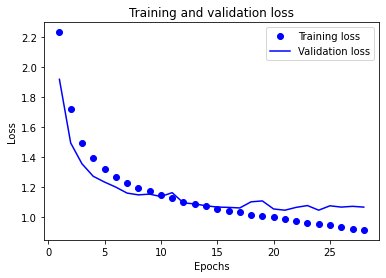

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()